# TMDB Box-office prediction
GROUP 28: Andreas Haukås, Christoffer Berge Pedersen Riis og Thomas Blom Tran

1. Look at the big picture
2. Get the data
3. Discover and visualize the data to gain insights
4. Prepare the data for Machine Learning algorithms
5. Select a model and train it
6. Fine-tune your model
7. Present your solution
8. Launch, monitor, and maintain your system

## 1. Look at the big picture

In 2018 the movie industry made an estimated $41.7 billion in 2018. The film industry is becoming more popular and with the highest revenue ever. The question is what kind of movies make the most money at box office? How much does the movie name, budget, actors, runtime, language spoken, genre and other variables matter? We have been given metadata from more than 7000 movies. 

In this assignment we will be using regression models from pycaret to create a machine learning model predicting how much a movie might make at box office. 

## Setup:

In [146]:
# Imports required libraries
from pycaret.regression import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
np.random.seed(42)
sessionID = 42069

In [147]:
# Using Pandas to import.csv files and create various dataframes.
Box_Office_data = pd.read_csv('./train.csv')        # train_Set
Box_Office_data_test = pd.read_csv('./test.csv')    # test_Set
sampleSub = pd.read_csv('./sample_submission.csv')  # sample for keggle submission

## 2. Get the data
Looking at the different datasets to find data we can use for our model.

In [148]:
# Displays the first three values in train.
Box_Office_data.head(3)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000


In [149]:
# Displays the first three values in test.
Box_Office_data_test.head(3)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."


In [150]:
# Displays more detailed information such as standard deviation, min, max, mean, and count.
Box_Office_data.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [151]:
# Displays more detailed information such as standard deviation, min, max, mean, and count.
Box_Office_data.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [152]:
# Shows information about the type of data used.
Box_Office_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

# Checking for null values which we may need to handle later:

In [153]:
Box_Office_data.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

# Checking for numerical features with 0s. If budget is 0, then it's an outlier and should be handled:

In [154]:
Box_Office_data[Box_Office_data['budget'] == 0].shape[0]

812

## Analysis of current data
Looking at the information above we can see that the data consists of many objects, numbers and nan values. We need to make sure that pycaret can input the correct datatypes. There is also a lot of different categories to look at.

## 3. Discover and visualize the data to gain insights
After seeing that the data contains a lot of different categories, we decided to first look at at revenue, popularity, budget and runtime.

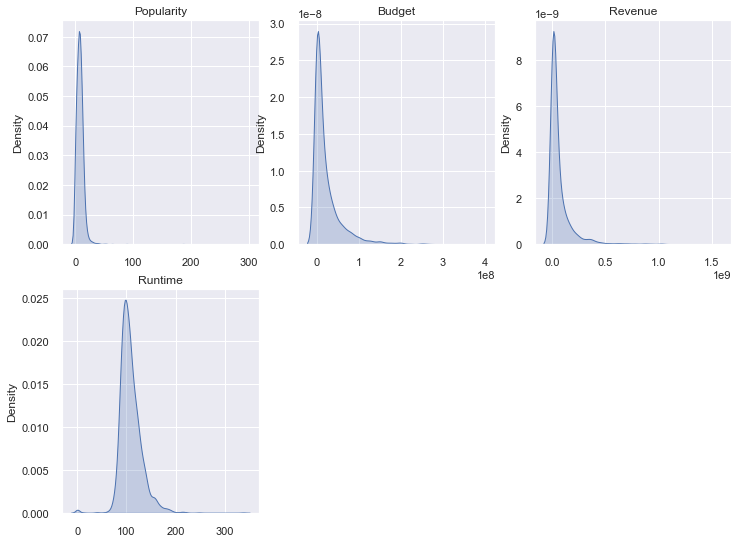

In [155]:
# Using subplot for the distrubution of popularity, budget, revenue and runtime.
sns.set(rc={"figure.figsize": (12, 14)})
plt.subplot(3,3,1)
ax=sns.kdeplot(Box_Office_data['popularity'].values, shade=True)
plt.title('Popularity')
plt.subplot(3,3,2)
ax=sns.kdeplot(Box_Office_data['budget'].values, shade = True)
plt.title('Budget')
plt.subplot(3,3,3)
ax=sns.kdeplot(Box_Office_data['revenue'].values, shade = True)
plt.title('Revenue')
plt.subplot(3,3,4)
ax=sns.kdeplot(Box_Office_data['runtime'].values, shade = True)
plt.title('Runtime')
plt.show()

## Comparing revenue with budget, runtime and popularity with joinplot.

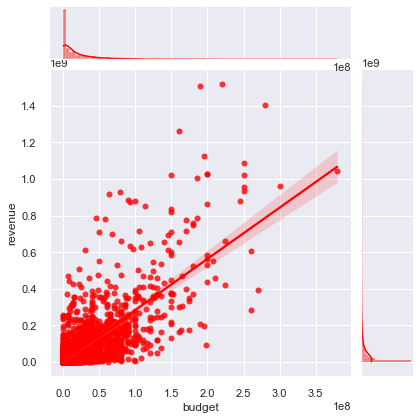

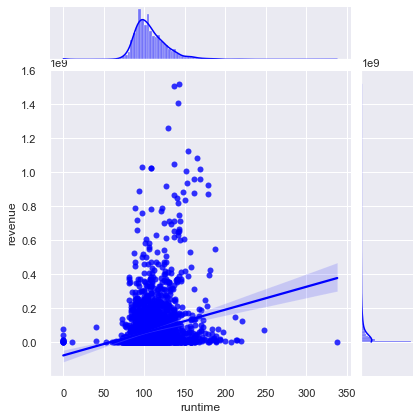

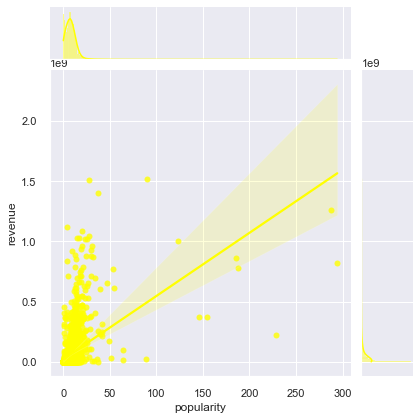

In [156]:
# Revenue together with budget, runtime and popularity.
sns.jointplot(x="budget", y="revenue", data=Box_Office_data, kind="reg", color = 'red')
sns.jointplot(x="runtime", y="revenue", data=Box_Office_data, kind="reg", color = 'blue')
sns.jointplot(x="popularity", y="revenue", data=Box_Office_data, kind="reg", color = 'yellow')
plt.show()

## Thoughts about revenue compared with budget, runtime and popularity.
Higher budget doesn't necessarily mean higher revenue.
Runtime between 80 and 150 mins seems to be a good number for revenue.
Popularity doesn't necessarily mean higher revenue.

## Runtime combined with revenue. 
Looking for correlation between revenue and the movie's total runtime.

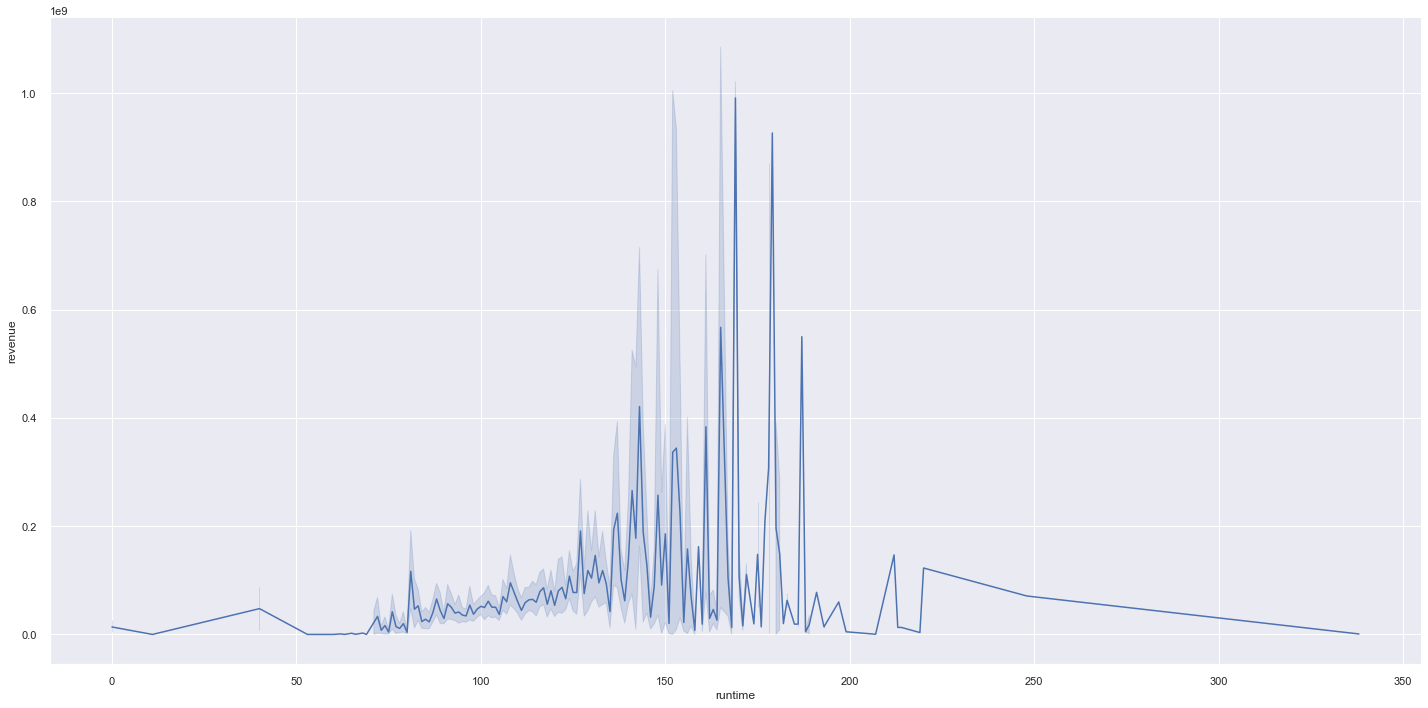

In [157]:
# Runtime based on revenue
sns.relplot(x="runtime", y="revenue", kind="line",height = 10, aspect = 2.0, data=Box_Office_data);
plt.show()

## Thoughts about runtime and revenue
Between 80 and 150 minutes as earlier, shows good revenue. Movies which has reached the highest income lies between 140 and 180 mins.

## Looking at revenue for the different movie original languages.

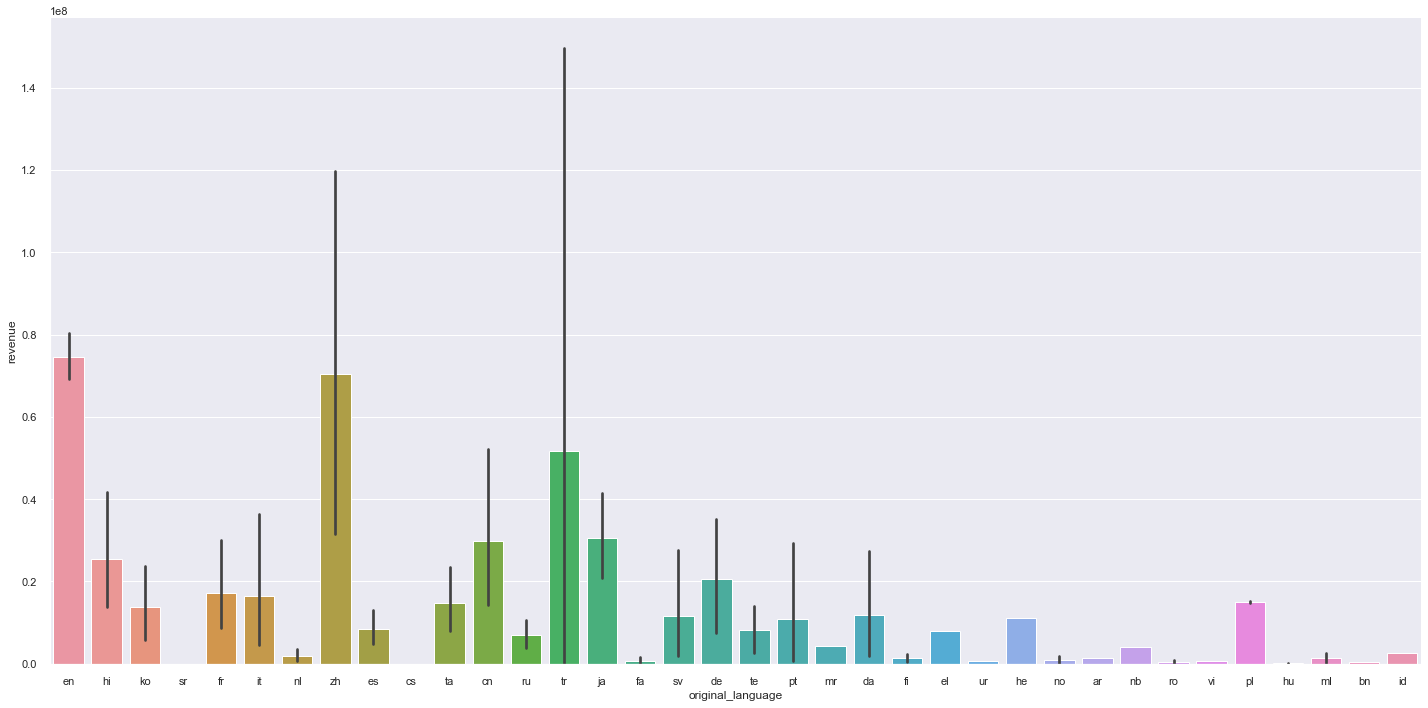

In [158]:
# Revenue based on the original language. 
sns.catplot(x="original_language", y="revenue",kind="bar",height = 10, aspect = 2.0, data=Box_Office_data)
plt.show()

## Thoughts on original_language and revenue.
We can cleary see that english and chinese give the highest revenue. This is expected as both languages have a huge audience.

## 4. Prepare the data for Machine Learning algorithms
It's time to dive in and prepare the data for pycaret.

In [159]:
#Looking at correlation with 'revenue'
corr_m = Box_Office_data.corr()
corr_m['revenue'].sort_values(ascending=False)

revenue       1.000000
budget        0.752965
popularity    0.461460
runtime       0.216380
id            0.000610
Name: revenue, dtype: float64

## Thoughts about correlation with revenue.
Highest is budget, popularity and then runtime. Id seems to have a rather lower correlation. Looking at this and the data above we have decided to give pycaret the following input:

## Preparing belongs_to_collection and release_date which contains nan and xx/xx/xx

In [160]:
trainNew = Box_Office_data[ [
    'belongs_to_collection', 
    'revenue', 
    'budget', 
    'runtime', 
    'release_date', 
    'genres', 
    'original_language',
    'popularity',
    'production_companies'
] ]

# belongs_to_collection
def transformBelongsToCollection(dataset):
    j = 0
    for i in dataset['belongs_to_collection']:
        if str(dataset['belongs_to_collection'][j]) == 'nan':
            dataset['belongs_to_collection'][j] = 0
        else:
            dataset['belongs_to_collection'][j] = 1
        j += 1

# release_date
def transformReleaseDate(dataset):
    j = 0
    for i in dataset['release_date']:
        releaseDateStr = str(dataset['release_date'][j])
        if releaseDateStr != 'nan':
            data = releaseDateStr.split('/')
            month = data[0].zfill(2)
            year = data[2]
            if int(data[2]) < 18:
                date=f'20{year}-{month}'
            else:
                date=f'19{year}-{month}'
            dataset['release_date'][j] = date
        j += 1        

transformBelongsToCollection(trainNew)
transformReleaseDate(trainNew)
trainNew.head(10)


,belongs_to_collection,revenue,budget,runtime,release_date,genres,original_language,popularity,production_companies
0,1,12314651,14000000,93.0,2015-02,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na..."
1,1,95149435,40000000,113.0,2004-08,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]"
2,0,13092000,3300000,105.0,2014-10,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ..."
3,0,16000000,1200000,122.0,2012-03,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN
4,0,3923970,0,118.0,2009-02,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN
5,0,3261638,8000000,83.0,1987-08,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",en,0.743274,NaN
6,0,85446075,14000000,92.0,2012-08,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",en,7.286477,"[{'name': 'Ghost House Pictures', 'id': 768}, ..."
7,0,2586511,0,84.0,2004-01,"[{'id': 99, 'name': 'Documentary'}]",en,1.949044,NaN
8,1,34327391,0,100.0,1996-02,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",en,6.902423,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'..."
9,0,18750246,6000000,91.0,2003-04,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",en,4.672036,"[{'name': 'Castle Rock Entertainment', 'id': 97}]"


## Setting up the data for pycaret.

Normally we would use SimpleImputer to remove the nan (not a number) values. Pycaret does this by default and uses the mean value to fill the empty spots.

In [161]:
data = setup(session_id=sessionID, data=trainNew, target='revenue', train_size=.99, numeric_imputation='median', normalize=True, normalize_method='robust', fold_shuffle=True, fold = 10)

,Description,Value
0,session_id,42069
1,Target,revenue
2,Original Data,"(3000, 9)"
3,Missing Values,True
4,Numeric Features,3
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2969, 2848)"


## 5. Select a model and train it
In this section we are looking for a good regression model to use for our dataset.

## The different regression models within pycaret

In [162]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


## Finding the best models using pycaret.
We have decided to use RMSLE instead of RMSE.
RMSE explodes in magnitude as soon as it encounters an outlier. In contrast, even on the introduction of the outlier, the RMSLE error is not affected much. We saw a couple of outliers in the different diagrams of our used data. 


In [163]:
best_models = compare_models(n_select=4, sort='RMSLE', include=['rf', 'gbr', 'en', 'huber', 'xgboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,36847985.1957,6015090471826655.0000,76646861.2275,0.6607,2.3412,8686.0980,5.1900
xgboost,Extreme Gradient Boosting,39664138.0000,6631380220274278.0000,80825564.8000,0.6241,2.5964,20447.2221,4.9210
en,Elastic Net,43885716.4000,7546129790638490.0000,85843783.6000,0.5896,2.7733,33053.8882,2.1320
gbr,Gradient Boosting Regressor,40506186.3409,6223412546140508.0000,77984698.5975,0.6533,2.8359,29917.3597,2.3460
huber,Huber Regressor,51118567.8665,14755248261437446.0000,119758507.5963,0.2113,2.8769,28591.5933,0.9500


## Best models based on RMSLE:

In [164]:
best_models

[RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42069, verbose=0, warm_start=False),
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='reg:squarederror',
         

## 6. Fine-tune your model
Using the best model and fine tuning it to work best for prediction.

In [165]:
tuned_best_models = [tune_model(i, optimize='RMSLE', n_iter=4) for i in best_models]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,39815625.3913,4988089896854440.0000,70626410.7601,0.4739,2.2722,50.9918
1,54164148.3283,10530657986858008.0000,102618994.2791,0.6137,3.1584,60045.2436
2,43137166.9884,6673000527886177.0000,81688435.7047,0.5966,2.7136,4118.6042
3,41175170.5144,5643178701007765.0000,75121093.5823,0.6206,3.3715,106754.2182
4,46856603.0909,9467938574040354.0000,97303332.8003,0.5528,2.5209,5108.6072
5,39389974.2806,5990436234684416.0000,77397908.4645,0.7751,2.7665,40130.3934
6,37481289.7907,4027584214961514.0000,63463250.9013,0.5969,2.4485,2990.1953
7,45613148.5894,8490200153250139.0000,92142282.1144,0.5297,2.8840,5642.4208
8,44536133.3742,6501741211934516.0000,80633375.2979,0.7127,2.9163,8751.6450
9,46349748.1646,9307610704343642.0000,96475959.2041,0.5410,3.1792,45446.3150


## Tuned model based on RMSLE:

In [166]:
tuned_best_models

[RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                       max_depth=3, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=150, n_jobs=-1, oob_score=False,
                       random_state=42069, verbose=0, warm_start=False),
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.306, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=240, n_jobs=-1,
              num_parallel_tree=1, objective='reg:squarederror',
              pre

## Using blender
The method of blending models uses consensus among estimators to generate a final prediction.

In [167]:
tunedblender = blend_models(estimator_list = tuned_best_models)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,35822052.0203,4728363845162308.0000,68763099.4441,0.5013,2.0608,239.9575
1,52710425.8262,11879051942124828.0000,108991063.5884,0.5642,2.8658,28339.3222
2,38051096.6568,5621247500623242.0000,74974979.1639,0.6602,2.3691,875.4746
3,35518185.5893,4683492046045566.0000,68436043.4716,0.6851,3.0028,53534.6189
4,42838275.6342,10166801830908246.0000,100830560.0049,0.5198,2.3038,2100.7865
5,36663911.0321,7327851839442076.0000,85602872.8457,0.7248,2.5858,30650.8816
6,34206294.5696,4323028075265913.0000,65749738.2144,0.5673,2.2665,1042.5942
7,38738657.0291,7140517146187866.0000,84501580.7319,0.6045,2.6848,19644.0401
8,37573384.0705,6772571518466939.0000,82295634.8688,0.7007,2.6447,4339.6302
9,41363395.6766,8799229250878459.0000,93804206.9999,0.5661,2.9798,38430.1655


In [168]:
blender = blend_models(estimator_list = best_models)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,36034821.5280,4507886668775682.0000,67140797.3499,0.5246,2.1525,307.0199
1,49943846.3061,9362511612220066.0000,96760072.4071,0.6565,2.8423,24931.2764
2,37627158.8214,4619386766178596.0000,67966070.6984,0.7207,2.4006,785.8398
3,35172833.6411,4102956903489496.5000,64054327.7499,0.7242,3.0796,48586.4530
4,42603240.0714,8481841825326218.0000,92096915.3953,0.5994,2.3134,2491.0678
5,35956270.4894,5461598376389190.0000,73902627.6690,0.7949,2.6390,29393.3122
6,34030229.6632,3852906717573808.0000,62071786.8083,0.6144,2.2840,828.4194
7,37783365.7143,5943363539019092.0000,77093213.3136,0.6708,2.7652,22724.0791
8,35251906.5653,5540778049337273.0000,74436402.7163,0.7552,2.6155,3325.7384
9,39910506.5199,7331569280643179.0000,85624583.3896,0.6385,3.0131,54106.8440


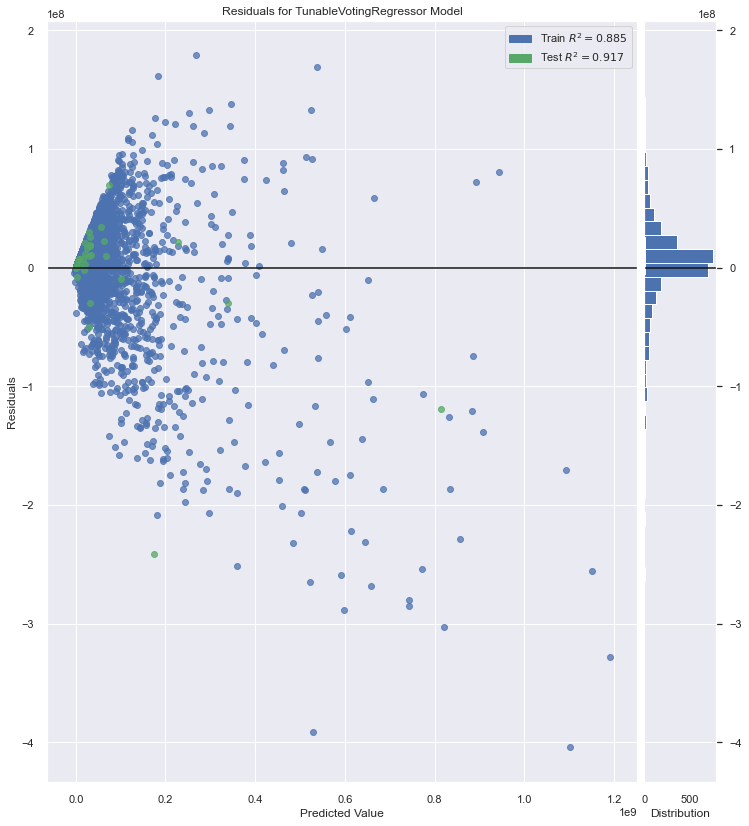

In [169]:
plot_model(blender)

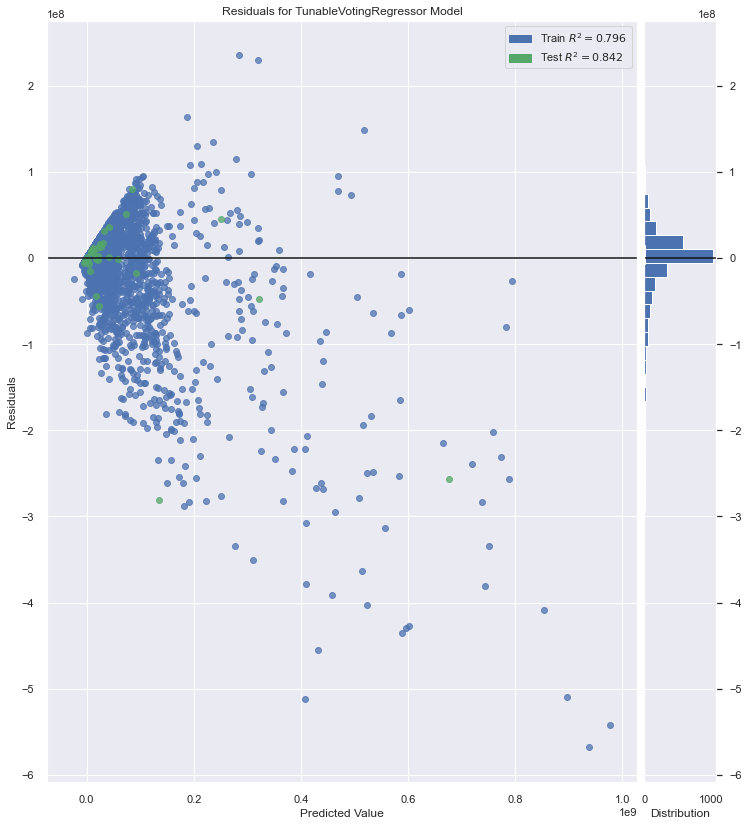

In [170]:
plot_model(tunedblender)

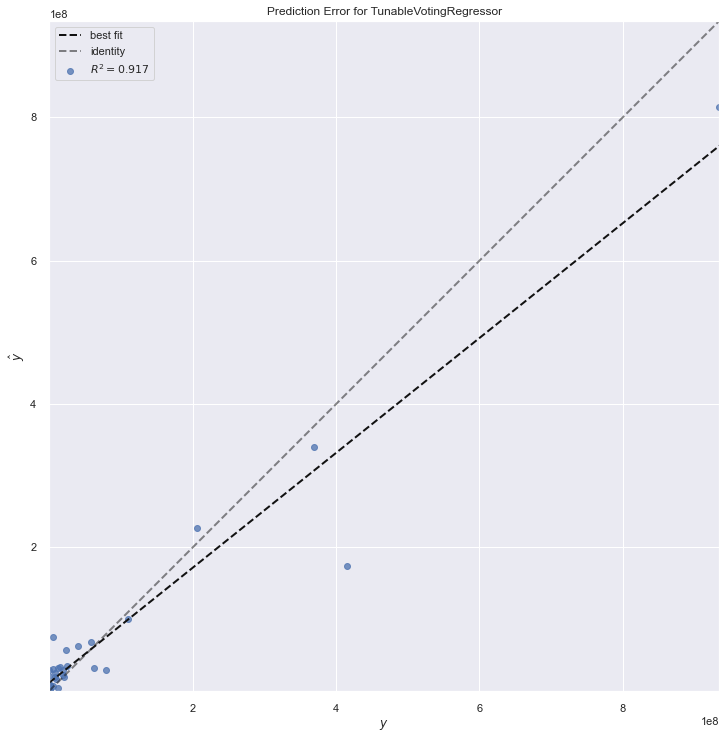

In [171]:
plot_model(blender, plot = 'error')

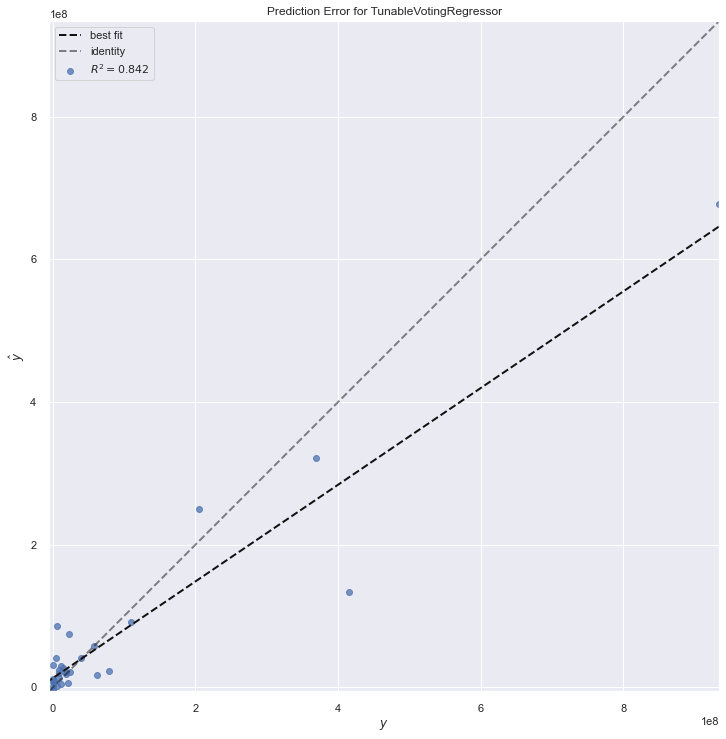

In [172]:
plot_model(tunedblender, plot = 'error')

## 7. Present your solution
We have now created a prediction that should be able to guess the revenue for a movie we give as input.

In [173]:
# Decided to use blender after looking at plots.
final_model = finalize_model(blender)

## 8. Launch, monitor, and maintain your system

In [175]:
# Exporting to revenue_pred.pkl
save_model(final_model, 'revenue_pred')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='revenue',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                                                                                min_samples_split=2,
       